In [3]:
!pip install census
!pip install us

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11940 sha256=c2139b75914fa4e8cacda47576d19cd367d9f6f26dc92651b3060d777324d9bf
  Stored in directory: /Users/bonnymcclain/Library/Caches/pip/wheels/1a/93/5b/98d3861ec2c4a9d90b16324c6f8d7e4db03e6a830bc993adbb
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp39-cp39-macosx_10_9_x86_64.whl size=22791 sha256=3247ee8686dc9fab9494a0504c980a4ad9757794fa757bd54b24a3924c0f7572
  Stored in directory: /Users/bonnymcclain/Library/Caches/pip/wheels/e6/7d/be/a937dbd1f988778a15011a563ac3a12917103bfc25ff6cb473
Successfully built us jellyfish


In [4]:
import census
import us

In [1]:
import cenpy
import osmnx
import matplotlib.pyplot as plt
%matplotlib inline


https://api.census.gov/data/2019/acs/acs5/variables.html

In [ ]:
https://api.census.gov/data/2020/acs/acs5/variables.html

from census import Census
from us import states

c = Census("8da8cd345b9292dd515a835f65c1fa51278b66a8")
hisp_census = c.acs5.state_county_tract(fields =('NAME','B01003_001E',B03001_003E),
                                           state_fips = states.CA.fips, county_fips ="*",tract="*",year=2020)
                                           

In [ ]:
from census import Census
from us import states

c = Census("8da8cd345b9292dd515a835f65c1fa51278b66a8")
ca_census = c.acs5.state_county_tract(fields =('NAME','C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                                           state_fips = states.CA.fips, county_fips ="*",tract="*",year=2020)

In [11]:
import pandas as pd

In [12]:
# Create a dataframe from the census data
ca_df = pd.DataFrame(ca_census)

# Show the dataframe
print(ca_df.head(2))
print('Shape: ', ca_df.shape)

                                                NAME  C17002_001E  \
0  Census Tract 3131.02, Contra Costa County, Cal...       4263.0   
1  Census Tract 3131.04, Contra Costa County, Cal...       2740.0   

   C17002_002E  C17002_003E  B01003_001E state county   tract  
0        250.0         90.0       4367.0    06    013  313102  
1        292.0        411.0       2740.0    06    013  313104  
Shape:  (9129, 8)


In [14]:
import geopandas as gpd

/Users/bonnymcclain/Downloads/tl_2020_06_tract/tl_2020_06_tract.shp

In [16]:
# Access shapefile of Virginia census tracts
ca_tract = gpd.read_file("/Users/bonnymcclain/Downloads/tl_2020_06_tract/tl_2020_06_tract.shp")

# Reproject shapefile to UTM Zone 17N
# https://spatialreference.org/ref/epsg/wgs-84-utm-zone-17n/
ca_tract = ca_tract.to_crs(epsg = 32617)

# Print GeoDataFrame of shapefile
print(ca_tract.head(2))
print('Shape: ', ca_tract.shape)

# Check shapefile projection
print("\nThe shapefile projection is: {}".format(ca_tract.crs))

  STATEFP COUNTYFP TRACTCE        GEOID   NAME            NAMELSAD  MTFCC  \
0      06      029  004402  06029004402  44.02  Census Tract 44.02  G5020   
1      06      047  000802  06047000802   8.02   Census Tract 8.02  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  1865739       0  +35.5917343  -119.3337642   
1        S  2321653       0  +37.3433591  -120.5854604   

                                            geometry  
0  POLYGON ((-3044922.684 4694377.275, -3044853.5...  
1  POLYGON ((-3064475.527 4955010.244, -3064409.0...  
Shape:  (9129, 13)

The shapefile projection is: epsg:32617


In [17]:
# Combine state, county, and tract columns together to create a new string and assign to new column
ca_df["GEOID"] = ca_df["state"] + ca_df["county"] + ca_df["tract"]

In [18]:
# Print head of dataframe
ca_df.head(2)

,NAME,C17002_001E,C17002_002E,C17002_003E,B01003_001E,state,county,tract,GEOID
0,"Census Tract 3131.02, Contra Costa County, Cal...",4263.0,250.0,90.0,4367.0,06,013,313102,06013313102
1,"Census Tract 3131.04, Contra Costa County, Cal...",2740.0,292.0,411.0,2740.0,06,013,313104,06013313104


In [19]:
# Remove columns
ca_df = ca_df.drop(columns = ["state", "county", "tract"])

# Show updated dataframe
ca_df.head(2)

,NAME,C17002_001E,C17002_002E,C17002_003E,B01003_001E,GEOID
0,"Census Tract 3131.02, Contra Costa County, Cal...",4263.0,250.0,90.0,4367.0,06013313102
1,"Census Tract 3131.04, Contra Costa County, Cal...",2740.0,292.0,411.0,2740.0,06013313104


In [20]:
# Check column data types for census data
print("Column data types for census data:\n{}".format(ca_df.dtypes))

# Check column data types for census shapefile
print("\nColumn data types for census shapefile:\n{}".format(ca_tract.dtypes))

Column data types for census data:
NAME            object
C17002_001E    float64
C17002_002E    float64
C17002_003E    float64
B01003_001E    float64
GEOID           object
dtype: object

Column data types for census shapefile:
STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object


In [21]:
# Join the attributes of the dataframes together
# Source: https://geopandas.org/docs/user_guide/mergingdata.html
ca_merge = ca_tract.merge(ca_df, on = "GEOID")

# Show result
print(ca_merge.head(2))
print('Shape: ', ca_merge.shape)

  STATEFP COUNTYFP TRACTCE        GEOID NAME_x            NAMELSAD  MTFCC  \
0      06      029  004402  06029004402  44.02  Census Tract 44.02  G5020   
1      06      047  000802  06047000802   8.02   Census Tract 8.02  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  1865739       0  +35.5917343  -119.3337642   
1        S  2321653       0  +37.3433591  -120.5854604   

                                            geometry  \
0  POLYGON ((-3044922.684 4694377.275, -3044853.5...   
1  POLYGON ((-3064475.527 4955010.244, -3064409.0...   

                                         NAME_y  C17002_001E  C17002_002E  \
0   Census Tract 44.02, Kern County, California       5204.0        387.0   
1  Census Tract 8.02, Merced County, California       4360.0        373.0   

   C17002_003E  B01003_001E  
0       1316.0       5209.0  
1        171.0       4360.0  
Shape:  (9129, 18)


In [22]:
# Create new dataframe from select columns
ca_poverty_tract = ca_merge[["STATEFP", "COUNTYFP", "TRACTCE", "GEOID", "geometry", "C17002_001E", "C17002_002E", "C17002_003E", "B01003_001E"]]

# Show dataframe
print(ca_poverty_tract.head(2))
print('Shape: ', ca_poverty_tract.shape)

  STATEFP COUNTYFP TRACTCE        GEOID  \
0      06      029  004402  06029004402   
1      06      047  000802  06047000802   

                                            geometry  C17002_001E  \
0  POLYGON ((-3044922.684 4694377.275, -3044853.5...       5204.0   
1  POLYGON ((-3064475.527 4955010.244, -3064409.0...       4360.0   

   C17002_002E  C17002_003E  B01003_001E  
0        387.0       1316.0       5209.0  
1        373.0        171.0       4360.0  
Shape:  (9129, 9)


In [23]:
# Dissolve and group the census tracts within each county and aggregate all the values together
# Source: https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html
ca_poverty_county = ca_poverty_tract.dissolve(by = 'COUNTYFP', aggfunc = 'sum')

# Show dataframe
print(ca_poverty_county.head(2))
print('Shape: ', ca_poverty_county.shape)

                                                   geometry  C17002_001E  \
COUNTYFP                                                                   
001       POLYGON ((-3190413.684 5037324.026, -3190504.4...    1635239.0   
003       POLYGON ((-2938609.541 5086604.727, -2938597.7...       1159.0   

          C17002_002E  C17002_003E  B01003_001E  
COUNTYFP                                         
001           76379.0      75681.0    1661584.0  
003              55.0         84.0       1159.0  
Shape:  (58, 5)


In [24]:
# Get poverty rate and store values in new column
ca_poverty_county["Poverty_Rate"] = (ca_poverty_county["C17002_002E"] + ca_poverty_county["C17002_003E"]) / ca_poverty_county["B01003_001E"] * 100

# Show dataframe
ca_poverty_county.head(2)

,geometry,C17002_001E,C17002_002E,C17002_003E,B01003_001E,Poverty_Rate
COUNTYFP,,,,,,
001,"POLYGON ((-3190413.684 5037324.026, -3190504.4...",1635239.0,76379.0,75681.0,1661584.0,9.151508
003,"POLYGON ((-2938609.541 5086604.727, -2938597.7...",1159.0,55.0,84.0,1159.0,11.993097


Text(0.5, 1.0, 'Poverty Rates (%) in California')

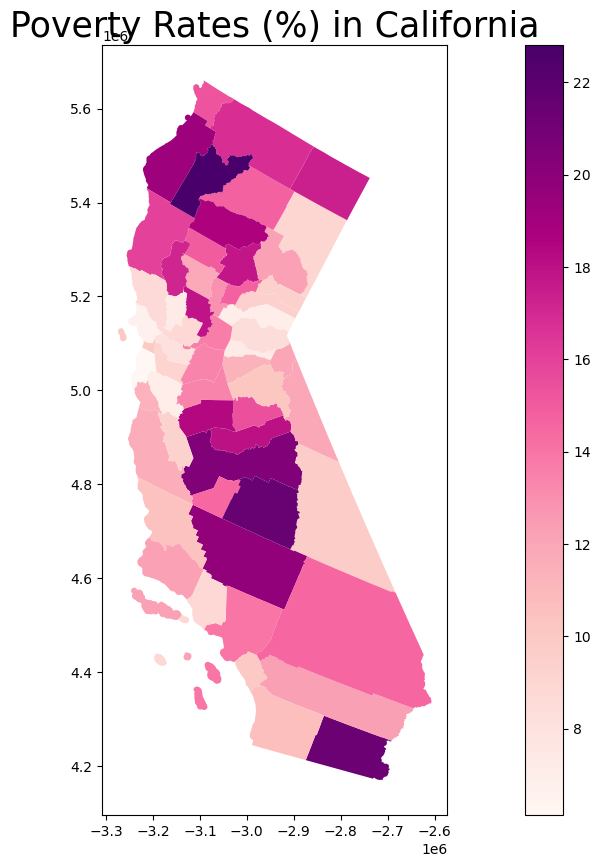

In [25]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
ca_poverty_county.plot(column = "Poverty_Rate",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Poverty Rates (%) in California', fontdict = {'fontsize': '25', 'fontweight' : '3'})

In [27]:
ca_graph = osmnx.graph_from_place('Los Angeles, California')

In [28]:
ca_graph

In [75]:
from census import Census
from us import states

c = Census("8da8cd345b9292dd515a835f65c1fa51278b66a8")
h_data = c.acs5.state_county_tract(fields =('B01003_001E','B03001_003E'),
                                           state_fips = states.CA.fips, county_fips ="037",tract="*",year=2020)

In [67]:
ca_graph = osmnx.graph_from_place('Los Angeles, CA')

In [68]:
ca_graph

In [70]:
h_data

[{'B01003_001E': 3006.0,
  'B03001_003E': 2043.0,
  'state': '06',
  'county': '037',
  'tract': '199700'},
 {'B01003_001E': 3618.0,
  'B03001_003E': 2500.0,
  'state': '06',
  'county': '037',
  'tract': '199801'},
 {'B01003_001E': 2419.0,
  'B03001_003E': 1062.0,
  'state': '06',
  'county': '037',
  'tract': '199802'},
 {'B01003_001E': 2687.0,
  'B03001_003E': 2202.0,
  'state': '06',
  'county': '037',
  'tract': '199900'},
 {'B01003_001E': 2203.0,
  'B03001_003E': 1562.0,
  'state': '06',
  'county': '037',
  'tract': '201110'},
 {'B01003_001E': 4043.0,
  'B03001_003E': 3182.0,
  'state': '06',
  'county': '037',
  'tract': '201120'},
 {'B01003_001E': 2709.0,
  'B03001_003E': 2135.0,
  'state': '06',
  'county': '037',
  'tract': '201200'},
 {'B01003_001E': 4377.0,
  'B03001_003E': 3470.0,
  'state': '06',
  'county': '037',
  'tract': '201301'},
 {'B01003_001E': 4247.0,
  'B03001_003E': 863.0,
  'state': '06',
  'county': '037',
  'tract': '201302'},
 {'B01003_001E': 4568.0,
  'B

In [71]:
ca_nodes, ca_streets  = osmnx.graph_to_gdfs(ca_graph)

In [72]:
ca_streets.head()

osmid lanes  \
u      v          key                                            
653688 4954137120 0                            398770659     6   
       1614655105 0    [398770658, 759468526, 759468527]     4   
653689 8495947174 0                            148455910   NaN   
       8495947173 0                            398771138     5   
       8495947176 0                            404964730     5   

                                     name      highway maxspeed  oneway  \
u      v          key                                                     
653688 4954137120 0    National Boulevard    secondary   35 mph   False   
       1614655105 0    National Boulevard    secondary   35 mph   False   
653689 8495947174 0       Military Avenue  residential      NaN   False   
       8495947173 0    National Boulevard    secondary   35 mph   False   
       8495947176 0    National Boulevard    secondary   35 mph   False   

                      reversed   length tunnel  \
u      v          key                            
653688 4954137120 0      False    6.560    NaN   
       1614655105 0       True  102.260    yes   
653689 8495947174 0       True   10.286    NaN   
       8495947173 0      False   10.031    NaN   
       8495947176 0       True    8.392    NaN   

                                                                geometry  \
u      v          key                                                      
653688 4954137120 0    LINESTRING (-118.42955 34.02703, -118.42948 34...   
       1614655105 0    LINESTRING (-118.42955 34.02703, -118.42980 34...   
653689 8495947174 0    LINESTRING (-118.42548 34.02864, -118.42542 34...   
       8495947173 0    LINESTRING (-118.42548 34.02864, -118.42538 34...   
       8495947176 0    LINESTRING (-118.42548 34.02864, -118.42556 34...   

                      bridge  ref service access junction width area  
u      v          key                                                 
653688 4954137120 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN  
       1614655105 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN  
653689 8495947174 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN  
       8495947173 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN  
       8495947176 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN

In [74]:
ca_streets = ca_streets.to_crs(h_data.crs)

AttributeError: 'list' object has no attribute 'crs'

In [59]:
h_data

[{'NAME': 'Census Tract 3131.02, Contra Costa County, California',
  'B01003_001E': 4367.0,
  'B03001_003E': 1492.0,
  'state': '06',
  'county': '013',
  'tract': '313102'},
 {'NAME': 'Census Tract 3131.04, Contra Costa County, California',
  'B01003_001E': 2740.0,
  'B03001_003E': 1191.0,
  'state': '06',
  'county': '013',
  'tract': '313104'},
 {'NAME': 'Census Tract 3131.05, Contra Costa County, California',
  'B01003_001E': 4701.0,
  'B03001_003E': 1818.0,
  'state': '06',
  'county': '013',
  'tract': '313105'},
 {'NAME': 'Census Tract 3131.06, Contra Costa County, California',
  'B01003_001E': 6689.0,
  'B03001_003E': 1944.0,
  'state': '06',
  'county': '013',
  'tract': '313106'},
 {'NAME': 'Census Tract 3131.07, Contra Costa County, California',
  'B01003_001E': 2656.0,
  'B03001_003E': 1074.0,
  'state': '06',
  'county': '013',
  'tract': '313107'},
 {'NAME': 'Census Tract 3132.03, Contra Costa County, California',
  'B01003_001E': 3366.0,
  'B03001_003E': 1533.0,
  'state

In [60]:
h_data.head()

AttributeError: 'list' object has no attribute 'head'

In [30]:
ca_nodes,ca_streets = osmnx.graph_to_gdfs(ca_graph)

In [31]:
ca_streets.head()

osmid lanes  \
u      v          key                                            
653688 4954137120 0                            398770659     6   
       1614655105 0    [398770658, 759468526, 759468527]     4   
653689 8495947174 0                            148455910   NaN   
       8495947173 0                            398771138     5   
       8495947176 0                            404964730     5   

                                     name      highway maxspeed  oneway  \
u      v          key                                                     
653688 4954137120 0    National Boulevard    secondary   35 mph   False   
       1614655105 0    National Boulevard    secondary   35 mph   False   
653689 8495947174 0       Military Avenue  residential      NaN   False   
       8495947173 0    National Boulevard    secondary   35 mph   False   
       8495947176 0    National Boulevard    secondary   35 mph   False   

                      reversed   length tunnel  \
u      v          key                            
653688 4954137120 0      False    6.560    NaN   
       1614655105 0       True  102.260    yes   
653689 8495947174 0       True   10.286    NaN   
       8495947173 0      False   10.031    NaN   
       8495947176 0       True    8.392    NaN   

                                                                geometry  \
u      v          key                                                      
653688 4954137120 0    LINESTRING (-118.42955 34.02703, -118.42948 34...   
       1614655105 0    LINESTRING (-118.42955 34.02703, -118.42980 34...   
653689 8495947174 0    LINESTRING (-118.42548 34.02864, -118.42542 34...   
       8495947173 0    LINESTRING (-118.42548 34.02864, -118.42538 34...   
       8495947176 0    LINESTRING (-118.42548 34.02864, -118.42556 34...   

                      bridge  ref service access junction width area  
u      v          key                                                 
653688 4954137120 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN  
       1614655105 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN  
653689 8495947174 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN  
       8495947173 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN  
       8495947176 0      NaN  NaN     NaN    NaN      NaN   NaN  NaN

In [32]:
ca_streets = ca_streets.to_crs(ca_poverty_county.crs)

B03001_001E total.  B03001_003E hispanic                      B03001_003E

In [53]:
ca_streets = ca_streets.to_crs(hisp_census.crs)

AttributeError: 'list' object has no attribute 'crs'

AttributeError: 'list' object has no attribute 'eval'

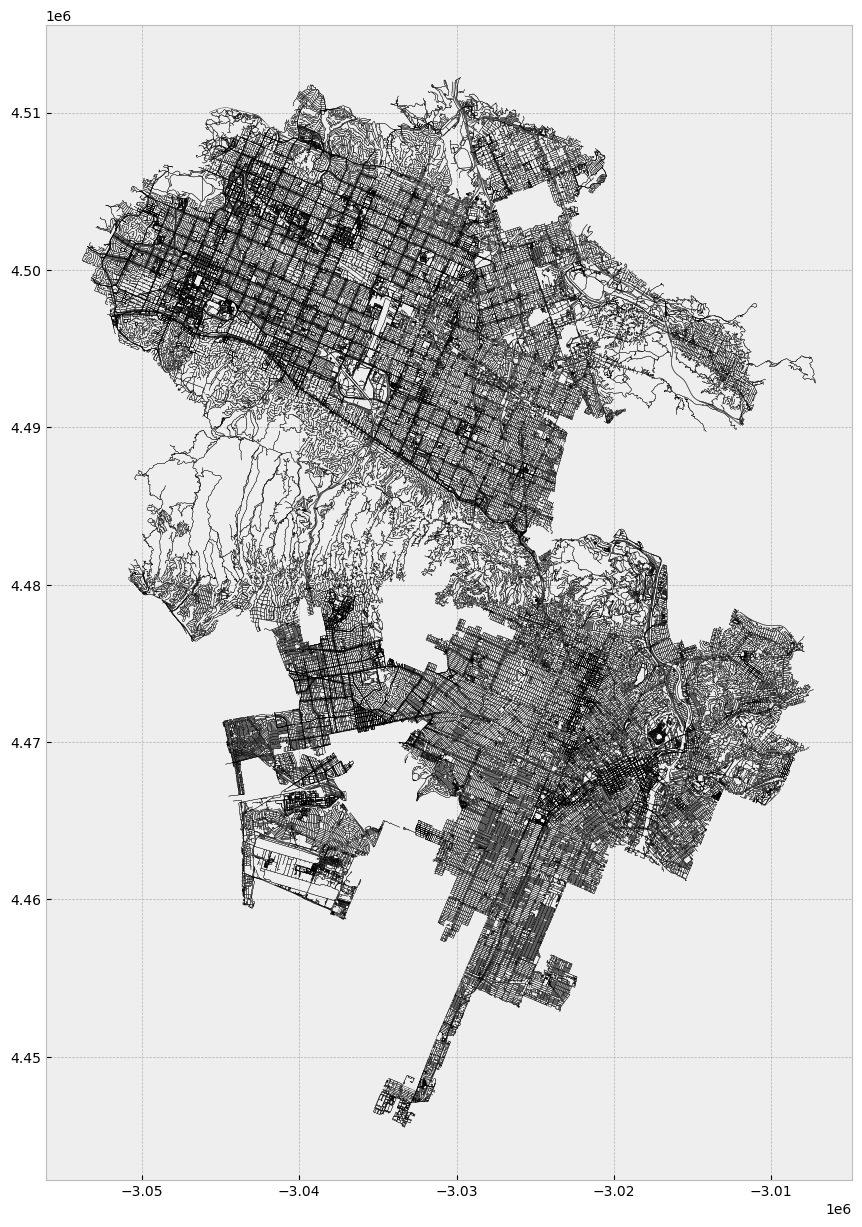

In [52]:
f,ax = plt.subplots(1,1, figsize=(15,15))
ca_streets.plot(linewidth=.25, ax=ax, color='k')
hisp_census.eval('pct_afam =  B03001_003E/ B03001_001E')\
        .plot('pct_afam', cmap='plasma', alpha=.7, ax=ax, linewidth=.25, edgecolor='k')
contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(ca_streets.total_bounds[[0,2,1,3]])
ax.set_title('Los Angeles\nHispanic %')
#ax.set_facecolor('k')
